## <font color='Lightgreen'> Note: I have used a Jupyter notebook and a Word report for my CA2. Can you please have a look on both when you are marking the module.</font>

### Ireland Milk Production Comparison with the EU Countries

### Project outcome
Create a datasheet of dairy product over time (1960 to 2020) for Ireland and other EU nations. Dataframe will be created from different dairy products, types of animals where dairy products are collected and total population of the Countries.


### Data Description
This data, which is in a csv file format, consists of Year, Ireland and other European countries. These columns contain information about the columns mentioned from 1960 to 2020.


### How Was This Data Collected?
Crop and Food data were obtained from the Food and Agricultural Organisation of the United Nations. FAO collects the data from all the countries in the world. FAO is an international organisation and it is a part of the United Nations. I am using raw data to form the base of my dataframes. FAO is a website that provides reliable data in various fields.
For more detailed information, please click the link below. Link:
https://www.fao.org/faostat/en/#data/QCL

Total yearly population data are collected from EUROSTAT which is freely available and there is no licensing requirement to access these data. This population is then compared to the other 27 countries in the EU. Four countries are identified as having a similar (+/- 1m people) population in 2020. The population data for these countries is downloaded. They can only be downloaded separately.
For more detailed information, please click the link below. Link:
https://data.worldbank.org/indicator/SP.POP.TOTL?end=2020&start=1960


### Is There a License for the Data Used?
The FAO, the website from which the data was obtained, has a Creative Commons Attribution 4.0 International license. This license type makes shared data publicly available according to open data standards and license datasets. Data are freely available and no licence is required to access or download the data.

In [3]:
# import libraries first
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
import datetime
import math
from matplotlib import pyplot as plt

Aim of this project is to investigate the milk production in Ireland by comparing Irish data with other EU countries based on similar climatic conditions or similar population levels.

## Section 1.0
# Creating Gantt chart for my project


In [5]:
# import libraries for the chart
import plotly.express as px
import pandas as pd
import plotly.figure_factory as ff
df = pd.DataFrame([
    dict(Task="Investigate & Develop Questions", Start='2022-12-04', Finish='2022-12-11', Resource='Complete'),
    dict(Task="Data Collection & Prep", Start='2022-12-10', Finish='2022-12-18',  Resource='Incomplete'),
    dict(Task="EDA & Statistics", Start='2022-12-12', Finish='2022-12-22',  Resource='Incomplete'),
    dict(Task="Machine Learning", Start='2022-12-20', Finish='2022-12-22',  Resource='Not Started'),
    dict(Task="Machine Learning", Start='2022-12-27', Finish='2023-01-01',  Resource='Not Started'),
    dict(Task="Report Writing ", Start='2022-12-18', Finish='2022-12-22',  Resource='Not Started'),
    dict(Task="Report Writing ", Start='2022-12-27', Finish='2023-01-05',  Resource='Not Started'),
    dict(Task="Submit ", Start='2023-01-06', Finish='2023-01-06',  Resource='Not Started')
])

colors = {'Not Started': 'rgb(220, 0, 0)',
          'Incomplete': (1, 0.9, 0.16),
          'Complete': 'rgb(0, 255, 100)'}

fig = ff.create_gantt(df, colors=colors, index_col='Resource', show_colorbar=True,
                      group_tasks=True)
fig.show();

## Section 2.0 Exploratory Data Analysis (EDA)
### 2.0.1 Import Data from the CSV file

In [6]:
# import the milk production data
# encoding is added to overcome following error
#UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 103043: invalid continuation byte
lp_df = pd.read_csv('datasets/livestock_products.csv', encoding='latin-1') 



In [7]:
# import the human propulaton data
# encoding is added to overcome following error
#UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 103043: invalid continuation byte
wpt_df = pd.read_csv('datasets/world_populations_total.csv', encoding='latin-1') 


In [8]:
# import the human propulaton in agriculture data
# encoding is added to overcome following error
#UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 103043: invalid continuation byte
wpt_agri_df = pd.read_csv('datasets/world_populations_farmers_total.csv', encoding='latin-1') 

### 2.0.2 Exploring the data

In [9]:
lp_df.head() # default shows first 5 rows

,ï»¿Domain_Code,Domain,Area Code,Area,Element_Code,Element,Item_Code,Item,Year_Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,2,Afghanistan,5420,Yield,1780,Milk,1961,1961,hg/An,753.0,E,Estimated value
1,QCL,Crops and livestock products,2,Afghanistan,5420,Yield,1780,Milk,1962,1962,hg/An,752.0,E,Estimated value
2,QCL,Crops and livestock products,2,Afghanistan,5420,Yield,1780,Milk,1963,1963,hg/An,779.0,E,Estimated value
3,QCL,Crops and livestock products,2,Afghanistan,5420,Yield,1780,Milk,1964,1964,hg/An,753.0,E,Estimated value
4,QCL,Crops and livestock products,2,Afghanistan,5420,Yield,1780,Milk,1965,1965,hg/An,784.0,E,Estimated value


In [10]:
wpt_df.head() # default shows first 5 rows

,ï»¿Country_Name,Country_Code,Indicator_Name,Indicator_Code,Year,Human_Population_Total
0,Afghanistan,AFG,Population total,SP.POP.TOTL,1960,8996967.0
1,Afghanistan,AFG,Population total,SP.POP.TOTL,1961,9169406.0
2,Afghanistan,AFG,Population total,SP.POP.TOTL,1962,9351442.0
3,Afghanistan,AFG,Population total,SP.POP.TOTL,1963,9543200.0
4,Afghanistan,AFG,Population total,SP.POP.TOTL,1964,9744772.0


In [11]:
wpt_agri_df.head() # default shows first 5 rows

,ï»¿Country_Name,Year,Human_Populationin_agriculture
0,Afghanistan,1960,NaN
1,Afghanistan,1961,NaN
2,Afghanistan,1962,NaN
3,Afghanistan,1963,NaN
4,Afghanistan,1964,NaN


In [12]:
lp_df.tail() # default shows last 5 rows

,ï»¿Domain_Code,Domain,Area Code,Area,Element_Code,Element,Item_Code,Item,Year_Code,Year,Unit,Value,Flag,Flag Description
37660,QCL,Crops and livestock products,5817,Net Food Importing Developing Countries,5318,Milk Animals,1780,Milk,2016,2016,Head,330972903.0,E,Estimated value
37661,QCL,Crops and livestock products,5817,Net Food Importing Developing Countries,5318,Milk Animals,1780,Milk,2017,2017,Head,332781005.0,E,Estimated value
37662,QCL,Crops and livestock products,5817,Net Food Importing Developing Countries,5318,Milk Animals,1780,Milk,2018,2018,Head,333856329.0,E,Estimated value
37663,QCL,Crops and livestock products,5817,Net Food Importing Developing Countries,5318,Milk Animals,1780,Milk,2019,2019,Head,350949439.0,E,Estimated value
37664,QCL,Crops and livestock products,5817,Net Food Importing Developing Countries,5318,Milk Animals,1780,Milk,2020,2020,Head,346548351.0,E,Estimated value


In [13]:
wpt_df.tail() # default shows last 5 rows

,ï»¿Country_Name,Country_Code,Indicator_Name,Indicator_Code,Year,Human_Population_Total
16160,Zimbabwe,ZWE,Population total,SP.POP.TOTL,2016,14030338.0
16161,Zimbabwe,ZWE,Population total,SP.POP.TOTL,2017,14236599.0
16162,Zimbabwe,ZWE,Population total,SP.POP.TOTL,2018,14438812.0
16163,Zimbabwe,ZWE,Population total,SP.POP.TOTL,2019,14645473.0
16164,Zimbabwe,ZWE,Population total,SP.POP.TOTL,2020,14862927.0


In [14]:
lp_df.columns # this will list all the column names


Index(['ï»¿Domain_Code', 'Domain', 'Area Code', 'Area', 'Element_Code',
       'Element', 'Item_Code', 'Item', 'Year_Code', 'Year', 'Unit', 'Value',
       'Flag', 'Flag Description'],
      dtype='object')

In [15]:
wpt_df.columns # this will list all the column names

Index(['ï»¿Country_Name', 'Country_Code', 'Indicator_Name', 'Indicator_Code',
       'Year', 'Human_Population_Total'],
      dtype='object')

In [16]:
wpt_agri_df.columns # this will list all the column names

Index(['ï»¿Country_Name', 'Year', 'Human_Populationin_agriculture'], dtype='object')

In [17]:
# upon observation noticed that some column name need to be fixed
# i identified the column name and remaned it
#fix column name in data frame lp_df
lp_df.rename(columns = {'ï»¿Domain_Code':'Domain_Code'}, inplace = True)


In [18]:
# upon observation noticed that some column name need to be fixed
# i identified the column name and remaned it
#fix column name in data frame wpt_df
wpt_df.rename(columns = {'ï»¿Country_Name':'Country_Name'}, inplace = True)

In [19]:
# upon observation noticed that some column name need to be fixed
# i identified the column name and remaned it
#fix column name in data frame wpt_df
wpt_agri_df.rename(columns = {'ï»¿Country_Name':'Country_Name'}, inplace = True)

In [20]:
lp_df.dtypes # data type for each variable in the dataframe

Domain_Code          object
Domain               object
Area Code             int64
Area                 object
Element_Code          int64
Element              object
Item_Code             int64
Item                 object
Year_Code             int64
Year                  int64
Unit                 object
Value               float64
Flag                 object
Flag Description     object
dtype: object

In [21]:
wpt_df.dtypes # data type for each variable in the dataframe

Country_Name               object
Country_Code               object
Indicator_Name             object
Indicator_Code             object
Year                        int64
Human_Population_Total    float64
dtype: object

In [22]:
wpt_agri_df.dtypes # data type for each variable in the dataframe

Country_Name                       object
Year                                int64
Human_Populationin_agriculture    float64
dtype: object

In [23]:
# since human data frame's population column have to be in int type so i need to change data type
#wpt_agri_df['Human_Populationin_agriculture']=wpt_agri_df['Human_Populationin_agriculture'].astype('int64')

In [24]:
wpt_df.describe() # description of the numeric data in the DataFrame

,Year,Human_Population_Total
count,16165.000000,1.615300e+04
mean,1990.000000,2.110183e+08
std,17.607361,6.940363e+08
min,1960.000000,2.833000e+03
25%,1975.000000,9.634160e+05
50%,1990.000000,6.664102e+06
75%,2005.000000,4.568498e+07
max,2020.000000,7.763933e+09


In [25]:
lp_df.describe() # description of the numeric data in the DataFrame

,Area Code,Element_Code,Item_Code,Year_Code,Year,Value
count,37665.000000,37665.000000,37665.0,37665.000000,37665.000000,3.765900e+04
mean,939.697730,5415.996495,1780.0,1991.274472,1991.274472,8.951000e+06
std,1903.276974,78.469991,0.0,17.306741,17.306741,4.341568e+07
min,1.000000,5318.000000,1780.0,1961.000000,1961.000000,7.000000e+00
25%,72.000000,5318.000000,1780.0,1976.000000,1976.000000,6.759500e+03
50%,147.000000,5420.000000,1780.0,1992.000000,1992.000000,6.008000e+04
75%,221.000000,5510.000000,1780.0,2006.000000,2006.000000,1.689276e+06
max,5817.000000,5510.000000,1780.0,2020.000000,2020.000000,8.868618e+08


In [26]:
lp_df.describe(include=object) #description of the non-numeric data in the DataFrame

,Domain_Code,Domain,Area,Element,Item,Unit,Flag,Flag Description
count,37665,37665,37665,37665,37665,37665,37665,37665
unique,1,1,231,3,1,3,2,2
top,QCL,Crops and livestock products,Afghanistan,Production,Milk,tonnes,E,Estimated value
freq,37665,37665,180,12566,37665,12566,36695,36695


### 2.0.3 Data indentification and cleaning

Identify the unique Element in the DF lp_df
need to merge the data from Element column
convert all the unique Element row into columns
this step was neccessory as data set is huge and data with element row are repeated multiple times

In [27]:
# identify unique element
lp_df["Element"].unique()

array(['Yield', 'Production', 'Milk Animals'], dtype=object)

In [28]:
# Dataframe contains 3 unique elements. Milk production (mp) is an element of interest.
# Subset the data to isolate Milk production (mp) data
milkproductionyeild_lp_df = lp_df[lp_df["Element"]=="Yield"]

In [29]:
# Dataframe contains 3 unique elements. Milk production (mp) is an element of interest.
# Subset the data to isolate Milk production (mp) data
milkproduction_lp_df = lp_df[lp_df["Element"]=="Production"]

In [30]:
# Dataframe contains 3 unique elements. Milk production (mp) is an element of interest.
# Subset the data to isolate Milk production (mp) data
milkproductionanimals_lp_df = lp_df[lp_df["Element"]=="Milk Animals"]


In [31]:
# change column names
# column name are change to give them meaningful name
#milkproduction_lp_df.head(80)
milkproductionanimals_lp_df.columns # this will list all the column names
# now identify the column and change the name
milkproductionanimals_lp_df.rename(columns = {'Element':'Animal_Element'}, inplace = True)
milkproductionanimals_lp_df.rename(columns = {'Unit':'Animal_Unit'}, inplace = True)
milkproductionanimals_lp_df.rename(columns = {'Value':'Animal_Value'}, inplace = True)


In [32]:
# change column names
# column name are change to give them meaningful name
#milkproduction_lp_df.head(80)
milkproduction_lp_df.columns # this will list all the column names
# now identify the column and change the name
milkproduction_lp_df.rename(columns = {'Element':'Production_Element'}, inplace = True)
milkproduction_lp_df.rename(columns = {'Unit':'Production_Unit'}, inplace = True)
milkproduction_lp_df.rename(columns = {'Value':'Production_Value'}, inplace = True)


In [33]:
# change column names
# column name are change to give them meaningful name
#milkproductionyeild_lp_df.head(80)
milkproductionyeild_lp_df.columns # this will list all the column names
# now identify the column and change the name
milkproductionyeild_lp_df.rename(columns = {'Element':'Yeild_Element'}, inplace = True)
milkproductionyeild_lp_df.rename(columns = {'Unit':'Yeild_Unit'}, inplace = True)
milkproductionyeild_lp_df.rename(columns = {'Value':'Yeild_Value'}, inplace = True)


In [34]:
# overview the changed column names
milkproductionyeild_lp_df.columns

Index(['Domain_Code', 'Domain', 'Area Code', 'Area', 'Element_Code',
       'Yeild_Element', 'Item_Code', 'Item', 'Year_Code', 'Year', 'Yeild_Unit',
       'Yeild_Value', 'Flag', 'Flag Description'],
      dtype='object')

In [35]:
# drop columns that are not neccessory
# columns that are not used in data sets are dropped
# dropping column will incrase the performance
milkproductionyeild_lp_df.drop(['Domain_Code', 'Domain', 'Area Code', 'Element_Code',
       'Item_Code', 'Item', 'Year_Code', 'Flag', 'Flag Description'], axis = 1, inplace = True)
milkproductionanimals_lp_df.drop(['Domain_Code', 'Domain', 'Area Code', 'Element_Code',
       'Item_Code', 'Item', 'Year_Code', 'Flag', 'Flag Description'], axis = 1, inplace = True)

In [36]:
milkproductionyeild_lp_df.head(80) # default shows first 5 rows

,Area,Yeild_Element,Year,Yeild_Unit,Yeild_Value
0,Afghanistan,Yield,1961,hg/An,753.0
1,Afghanistan,Yield,1962,hg/An,752.0
2,Afghanistan,Yield,1963,hg/An,779.0
3,Afghanistan,Yield,1964,hg/An,753.0
4,Afghanistan,Yield,1965,hg/An,784.0
...,...,...,...,...,...
195,Albania,Yield,1976,hg/An,1803.0
196,Albania,Yield,1977,hg/An,1941.0
197,Albania,Yield,1978,hg/An,2072.0
198,Albania,Yield,1979,hg/An,2144.0


In [37]:
milkproduction_lp_df.shape  # to check row and columns are in the dataframe

(12566, 14)

In [38]:
milkproduction_lp_df.describe(include=object) #description of the non-numeric data in the DataFrame

,Domain_Code,Domain,Area,Production_Element,Item,Production_Unit,Flag,Flag Description
count,12566,12566,12566,12566,12566,12566,12566,12566
unique,1,1,231,1,1,1,1,1
top,QCL,Crops and livestock products,Afghanistan,Production,Milk,tonnes,E,Estimated value
freq,12566,12566,60,12566,12566,12566,12566,12566


In [39]:
# now find the unique countries name in the data frame
# also check that Ireland is available in the dataset
milkproduction_lp_df["Area"].unique()


array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belgium-Luxembourg', 'Belize',
       'Benin', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, mainland',
       'China, Taiwan Province of', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', "CÃ´te d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Czechoslovakia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Eritrea', 'Estonia

In [40]:
# now merge three data frame into one
world_production_lp_df=pd.merge(pd.merge(milkproduction_lp_df,milkproductionyeild_lp_df,on=['Area', 'Year']),milkproductionanimals_lp_df,on=['Area','Year'])

In [41]:
#view column name
world_production_lp_df.columns


Index(['Domain_Code', 'Domain', 'Area Code', 'Area', 'Element_Code',
       'Production_Element', 'Item_Code', 'Item', 'Year_Code', 'Year',
       'Production_Unit', 'Production_Value', 'Flag', 'Flag Description',
       'Yeild_Element', 'Yeild_Unit', 'Yeild_Value', 'Animal_Element',
       'Animal_Unit', 'Animal_Value'],
      dtype='object')

In [42]:
# drop columns that are not neccessory
# columns that are not used in data sets are dropped
# dropping column will incrase the performance
world_production_lp_df.drop(['Domain_Code', 'Domain', 'Area Code', 'Element_Code',
       'Item_Code', 'Year_Code', 'Flag', 'Flag Description'], axis = 1, inplace = True)

### 2.0.4 Merge milk production data with human population data
Data frame wpt_df contains world human population data

In [43]:
# now merge population with milk production data
wpt_df.tail() 

,Country_Name,Country_Code,Indicator_Name,Indicator_Code,Year,Human_Population_Total
16160,Zimbabwe,ZWE,Population total,SP.POP.TOTL,2016,14030338.0
16161,Zimbabwe,ZWE,Population total,SP.POP.TOTL,2017,14236599.0
16162,Zimbabwe,ZWE,Population total,SP.POP.TOTL,2018,14438812.0
16163,Zimbabwe,ZWE,Population total,SP.POP.TOTL,2019,14645473.0
16164,Zimbabwe,ZWE,Population total,SP.POP.TOTL,2020,14862927.0


In [44]:
wpt_df.columns

Index(['Country_Name', 'Country_Code', 'Indicator_Name', 'Indicator_Code',
       'Year', 'Human_Population_Total'],
      dtype='object')

In [45]:
wpt_df.head()

,Country_Name,Country_Code,Indicator_Name,Indicator_Code,Year,Human_Population_Total
0,Afghanistan,AFG,Population total,SP.POP.TOTL,1960,8996967.0
1,Afghanistan,AFG,Population total,SP.POP.TOTL,1961,9169406.0
2,Afghanistan,AFG,Population total,SP.POP.TOTL,1962,9351442.0
3,Afghanistan,AFG,Population total,SP.POP.TOTL,1963,9543200.0
4,Afghanistan,AFG,Population total,SP.POP.TOTL,1964,9744772.0


In [46]:
# now merge animal production and human population data set
world_production_inc_lp_df = pd.merge(left=world_production_lp_df, right=wpt_df, on=None, left_on=['Area', 'Year'], right_on=['Country_Name', 'Year'])

In [47]:
world_production_inc_lp_df.head()

,Area,Production_Element,Item,Year,Production_Unit,Production_Value,Yeild_Element,Yeild_Unit,Yeild_Value,Animal_Element,Animal_Unit,Animal_Value,Country_Name,Country_Code,Indicator_Name,Indicator_Code,Human_Population_Total
0,Afghanistan,Production,Milk,1961,tonnes,574900.0,Yield,hg/An,753.0,Milk Animals,Head,7639000.0,Afghanistan,AFG,Population total,SP.POP.TOTL,9169406.0
1,Afghanistan,Production,Milk,1962,tonnes,576700.0,Yield,hg/An,752.0,Milk Animals,Head,7672000.0,Afghanistan,AFG,Population total,SP.POP.TOTL,9351442.0
2,Afghanistan,Production,Milk,1963,tonnes,646700.0,Yield,hg/An,779.0,Milk Animals,Head,8307000.0,Afghanistan,AFG,Population total,SP.POP.TOTL,9543200.0
3,Afghanistan,Production,Milk,1964,tonnes,659900.0,Yield,hg/An,753.0,Milk Animals,Head,8765000.0,Afghanistan,AFG,Population total,SP.POP.TOTL,9744772.0
4,Afghanistan,Production,Milk,1965,tonnes,720900.0,Yield,hg/An,784.0,Milk Animals,Head,9200000.0,Afghanistan,AFG,Population total,SP.POP.TOTL,9956318.0


In [48]:
# drop columns that are not neccessory
world_production_inc_lp_df.drop(['Country_Name','Indicator_Name','Indicator_Code'], axis = 1, inplace = True)

In [49]:
world_production_inc_lp_df.head()

,Area,Production_Element,Item,Year,Production_Unit,Production_Value,Yeild_Element,Yeild_Unit,Yeild_Value,Animal_Element,Animal_Unit,Animal_Value,Country_Code,Human_Population_Total
0,Afghanistan,Production,Milk,1961,tonnes,574900.0,Yield,hg/An,753.0,Milk Animals,Head,7639000.0,AFG,9169406.0
1,Afghanistan,Production,Milk,1962,tonnes,576700.0,Yield,hg/An,752.0,Milk Animals,Head,7672000.0,AFG,9351442.0
2,Afghanistan,Production,Milk,1963,tonnes,646700.0,Yield,hg/An,779.0,Milk Animals,Head,8307000.0,AFG,9543200.0
3,Afghanistan,Production,Milk,1964,tonnes,659900.0,Yield,hg/An,753.0,Milk Animals,Head,8765000.0,AFG,9744772.0
4,Afghanistan,Production,Milk,1965,tonnes,720900.0,Yield,hg/An,784.0,Milk Animals,Head,9200000.0,AFG,9956318.0


### 2.0.5 Extraction of European country data from the data frame
This project evaluates milk production only in European countries so I need to extract European countries data from the main dataframe world_production_inc_lp_df

#### Using Library countrygroups
This library lists country groups as lists of ISO codes, especially those related to the UNFCCC climate policy process
This library was use to extract european countries data from the main dataset 

In [50]:
#library countrygroups
#!pip install countrygroups

In [51]:
# get european country list

from countrygroups import EUROPEAN_UNION

#print(EUROPEAN_UNION.names)
eucountry_list = (EUROPEAN_UNION.names)
print(eucountry_list)
#new_list = [word.upper() for word in EUROPEAN_UNION.names]
#print(new_list)


['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']


In [52]:
#now filter european country data
eu_production_lp_df = world_production_inc_lp_df.loc[world_production_inc_lp_df['Area'].isin(eucountry_list)] 
print(eu_production_lp_df.shape)


(1323, 14)


In [53]:
#eu_production_lp_df.to_csv("test.csv")

In [54]:
# find the european countries name in the datafame
eu_production_lp_df["Area"].unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia',
       'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg',
       'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania',
       'Slovakia', 'Slovenia', 'Spain', 'Sweden'], dtype=object)

In [55]:
eu_production_lp_df.describe() # statistical description, only for numeric values

,Year,Production_Value,Yeild_Value,Animal_Value,Human_Population_Total
count,1323.000000,1.323000e+03,1323.000000,1.323000e+03,1.323000e+03
mean,1993.495087,6.057124e+06,34213.859410,3.020511e+06,1.787774e+07
std,17.231377,7.735820e+06,23772.687282,3.630006e+06,2.155799e+07
min,1961.000000,2.500000e+04,985.000000,1.400400e+04,3.019960e+05
25%,1979.000000,1.281618e+06,13201.500000,3.936315e+05,4.533528e+06
50%,1996.000000,3.130613e+06,31700.000000,1.091000e+06,8.874520e+06
75%,2008.000000,6.857486e+06,51296.000000,5.780022e+06,2.124367e+07
max,2020.000000,3.457750e+07,100283.000000,1.358670e+07,8.316087e+07


### 2.0.6 Missing data treatment
<strong>Why dont we ingnore mssing data?</strong>
<br>
Missing data are important because, depending on the type, they can sometimes bias your results. This means results may not be generalisable outside of study because data come from an unrepresentative sample.

In [56]:
# now check null if there is any value
eu_production_lp_df.isnull().sum() # check for missing data

Area                      0
Production_Element        0
Item                      0
Year                      0
Production_Unit           0
Production_Value          0
Yeild_Element             0
Yeild_Unit                0
Yeild_Value               0
Animal_Element            0
Animal_Unit               0
Animal_Value              0
Country_Code              0
Human_Population_Total    0
dtype: int64

In [57]:
# find any duplicate row in dataframe capelst_dt
duplicate_rows_dfs = eu_production_lp_df[eu_production_lp_df.duplicated()]
print('duplicate rows numbers: ', duplicate_rows_dfs.shape)

duplicate rows numbers:  (0, 14)


In [58]:
# identify the line where null value exist
eu_productionVal = eu_production_lp_df[eu_production_lp_df.isna().any(axis=1)]
eu_productionVal

,Area,Production_Element,Item,Year,Production_Unit,Production_Value,Yeild_Element,Yeild_Unit,Yeild_Value,Animal_Element,Animal_Unit,Animal_Value,Country_Code,Human_Population_Total


In [59]:
# check if there is any zero value
#eu_production_lp_df.loc[(eu_production_lp_df==0).any(axis=1)]

#### Maximum value
Identify maximum Production_Value value in data frame eu_production_lp_df's column Production_Value

There are inbuilt method in pandas to calculate the maximum value. 
I chose get this information by writting my own function 

Why calculate maximum value?
I calculated maximum to find out the maximum milk production value and which country produced it.


In [60]:
# calculate mean value

#create a function
eu_production_pdntotal_numbers = np.array(eu_production_lp_df['Production_Value']) 
maximum_value = eu_production_pdntotal_numbers[0]
#using for loop
for number in eu_production_pdntotal_numbers:
    if number > maximum_value:
        maximum_value = number

print('Maximum value is:', maximum_value)        
print('Country name is:', eu_production_lp_df.loc[eu_production_lp_df["Production_Value"]==maximum_value,'Area'].iloc[0])




Maximum value is: 34577496.0
Country name is: Germany


In [63]:
# now check null value
eu_production_lp_df.dtypes
# since human data frame's population column have to be in int type so i need to change data type
#wpt_df['Human_Population_Total']=wpt_df['Human_Population_Total'].astype('int64')

Area                       object
Production_Element         object
Item                       object
Year                        int64
Production_Unit            object
Production_Value          float64
Yeild_Element              object
Yeild_Unit                 object
Yeild_Value               float64
Animal_Element             object
Animal_Unit                object
Animal_Value              float64
Country_Code               object
Human_Population_Total    float64
dtype: object

In [64]:
# since column Human_Population_Total and Animal_Value have to in int data type so I needed to change the data type for these columns
eu_production_lp_df['Human_Population_Total']=eu_production_lp_df['Human_Population_Total'].astype('int64')
eu_production_lp_df['Animal_Value']=eu_production_lp_df['Animal_Value'].astype('int64')

In [138]:

# Look at the data from Year 2020
eu_production_lp_df2020 = eu_production_lp_df[eu_production_lp_df['Year'] == 2020]


In [139]:
eu_production_lp_df2020

,Area,Production_Element,Item,Year,Production_Unit,Production_Value,Yeild_Element,Yeild_Unit,Yeild_Value,Animal_Element,Animal_Unit,Animal_Value,Country_Code,Human_Population_Total
508,Austria,Production,Milk,2020,tonnes,3852260.0,Yield,hg/An,62887.0,Milk Animals,Head,612564,AUT,8916864
767,Belgium,Production,Milk,2020,tonnes,4494000.0,Yield,hg/An,81514.0,Milk Animals,Head,551314,BEL,11544241
1216,Bulgaria,Production,Milk,2020,tonnes,1005450.0,Yield,hg/An,6804.0,Milk Animals,Head,1477781,BGR,6934015
1995,Croatia,Production,Milk,2020,tonnes,612000.0,Yield,hg/An,22583.0,Milk Animals,Head,271000,HRV,4047680
2115,Cyprus,Production,Milk,2020,tonnes,347400.0,Yield,hg/An,8927.0,Milk Animals,Head,389151,CYP,1207361
2143,Czechia,Production,Milk,2020,tonnes,3282371.0,Yield,hg/An,72542.0,Milk Animals,Head,452479,CZE,10697858
2203,Denmark,Production,Milk,2020,tonnes,5666000.0,Yield,hg/An,100283.0,Milk Animals,Head,565000,DNK,5831404
2560,Estonia,Production,Milk,2020,tonnes,849000.0,Yield,hg/An,97211.0,Milk Animals,Head,87336,EST,1329479
2768,Finland,Production,Milk,2020,tonnes,2406520.0,Yield,hg/An,94144.0,Milk Animals,Head,255620,FIN,5529543
2828,France,Production,Milk,2020,tonnes,26152110.0,Yield,hg/An,41824.0,Milk Animals,Head,6252900,FRA,67379908


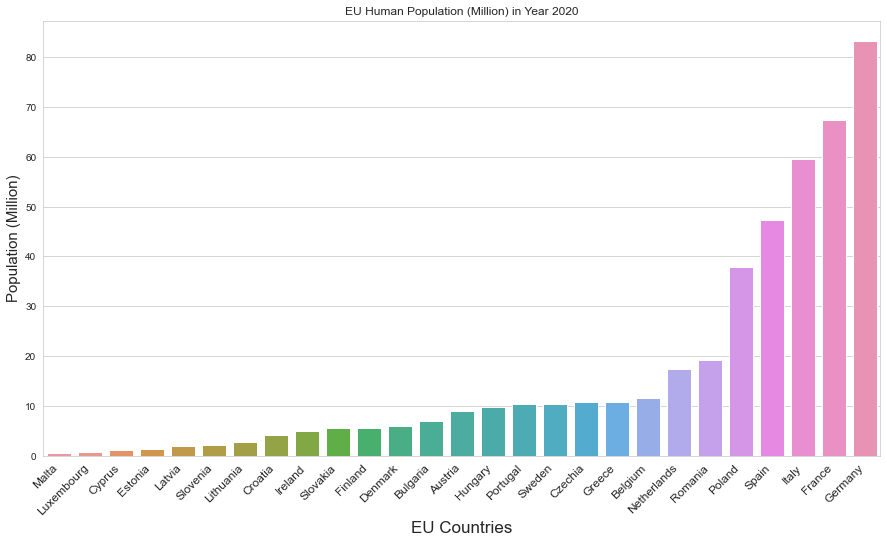

In [147]:
# Eu countries population in 2020 barplot example
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib

plt.figure(figsize=(15,8))

# sort by human population column
eu_production_lp_df2020.sort_values(by='Human_Population_Total', inplace=True)

barplot_capel_ax =sns.barplot(x = eu_production_lp_df2020['Area'], y = eu_production_lp_df2020['Human_Population_Total']);

# set name for the axis
barplot_capel_ax.set_xlabel('EU Countries', fontdict={'fontsize' : 17})
barplot_capel_ax.set_ylabel('Population (Million)', fontdict={'fontsize' : 15})

barplot_capel_ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x)//10**6, ',')))

# set fontsize and rotation of x-axis tick labels
plt.xticks(rotation=45, ha='right', fontsize=12)

# Setting the title for the graph
barplot_capel_ax.set_title("EU Human Population (Million) in Year 2020");

Get the data from only eu countries that has +/- 1 million population when compared with Irish population in 2020


In [66]:
# data based on list of folliwing Values (counrty name)
values=["SVK","IRL","DNK","HRV","FIN"]
selected_eu_production_lp_df = eu_production_lp_df[eu_production_lp_df["Country_Code"].isin(values)]

In [67]:
selected_eu_production_lp_df

,Area,Production_Element,Item,Year,Production_Unit,Production_Value,Yeild_Element,Yeild_Unit,Yeild_Value,Animal_Element,Animal_Unit,Animal_Value,Country_Code,Human_Population_Total
1967,Croatia,Production,Milk,1992,tonnes,713534.0,Yield,hg/An,14665.0,Milk Animals,Head,486542,HRV,4575818
1968,Croatia,Production,Milk,1993,tonnes,625100.0,Yield,hg/An,14990.0,Milk Animals,Head,417000,HRV,4600463
1969,Croatia,Production,Milk,1994,tonnes,605738.0,Yield,hg/An,13910.0,Milk Animals,Head,435484,HRV,4652024
1970,Croatia,Production,Milk,1995,tonnes,598084.0,Yield,hg/An,15602.0,Milk Animals,Head,383328,HRV,4620030
1971,Croatia,Production,Milk,1996,tonnes,626437.0,Yield,hg/An,17179.0,Milk Animals,Head,364648,HRV,4557097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7217,Slovakia,Production,Milk,2016,tonnes,968293.0,Yield,hg/An,26905.0,Milk Animals,Head,359890,SVK,5426252
7218,Slovakia,Production,Milk,2017,tonnes,944921.0,Yield,hg/An,27191.0,Milk Animals,Head,347514,SVK,5435343
7219,Slovakia,Production,Milk,2018,tonnes,917000.0,Yield,hg/An,26629.0,Milk Animals,Head,344360,SVK,5443120
7220,Slovakia,Production,Milk,2019,tonnes,915710.0,Yield,hg/An,28435.0,Milk Animals,Head,322040,SVK,5450421


### Handling outliers
####  What is outliers, why you need to handle it
Outliers are nothing but data points that differ significantly from other observations. They are the points that lie outside the overall distribution of the dataset. If not treated, can cause serious problems in statistical analyses.

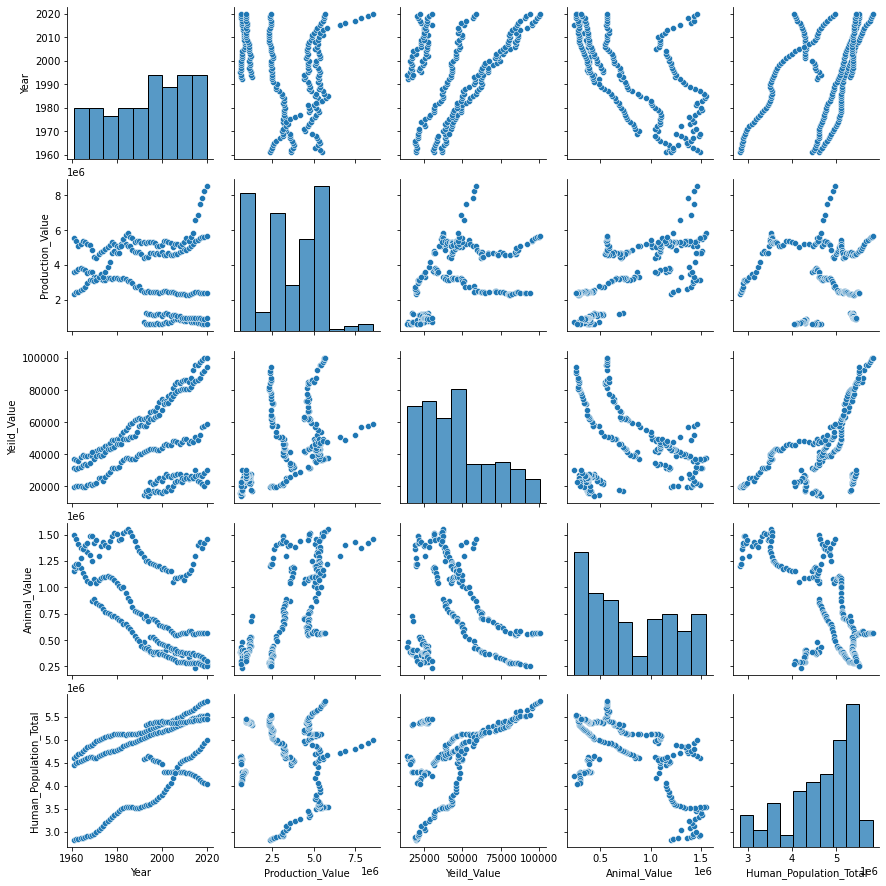

In [68]:
#to pair the data
sns.pairplot(selected_eu_production_lp_df)

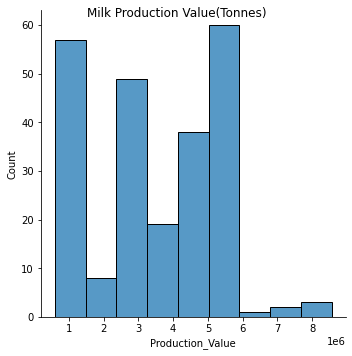

In [69]:
# to see against which feature i want to work with
ax =sns.displot(selected_eu_production_lp_df["Production_Value"]);
ax.fig.suptitle('Milk Production Value(Tonnes)');


In [70]:
#eu_production_lp_df["Production_Value"]
eu_production_lp_df

,Area,Production_Element,Item,Year,Production_Unit,Production_Value,Yeild_Element,Yeild_Unit,Yeild_Value,Animal_Element,Animal_Unit,Animal_Value,Country_Code,Human_Population_Total
449,Austria,Production,Milk,1961,tonnes,2972611.0,Yield,hg/An,23250.0,Milk Animals,Head,1278559,AUT,7086299
450,Austria,Production,Milk,1962,tonnes,3064786.0,Yield,hg/An,24251.0,Milk Animals,Head,1263753,AUT,7129864
451,Austria,Production,Milk,1963,tonnes,3106694.0,Yield,hg/An,24919.0,Milk Animals,Head,1246704,AUT,7175811
452,Austria,Production,Milk,1964,tonnes,3179100.0,Yield,hg/An,25985.0,Milk Animals,Head,1223420,AUT,7223801
453,Austria,Production,Milk,1965,tonnes,3255700.0,Yield,hg/An,26923.0,Milk Animals,Head,1209280,AUT,7270889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7684,Sweden,Production,Milk,2016,tonnes,2862000.0,Yield,hg/An,87759.0,Milk Animals,Head,326122,SWE,9923085
7685,Sweden,Production,Milk,2017,tonnes,2816660.0,Yield,hg/An,86284.0,Milk Animals,Head,326440,SWE,10057698
7686,Sweden,Production,Milk,2018,tonnes,2760230.0,Yield,hg/An,88172.0,Milk Animals,Head,313050,SWE,10175214
7687,Sweden,Production,Milk,2019,tonnes,2704390.0,Yield,hg/An,89734.0,Milk Animals,Head,301380,SWE,10278887


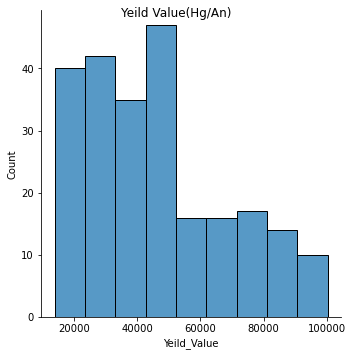

In [71]:
# to see against which feature i want to work with
ax =sns.displot(selected_eu_production_lp_df["Yeild_Value"]);
ax.fig.suptitle('Yeild Value(Hg/An)');

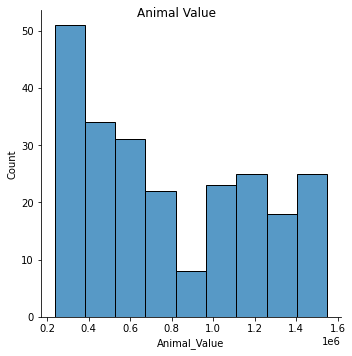

In [72]:
# to see against which feature i want to work with
ax= sns.displot(selected_eu_production_lp_df["Animal_Value"]);
ax.fig.suptitle('Animal Value');

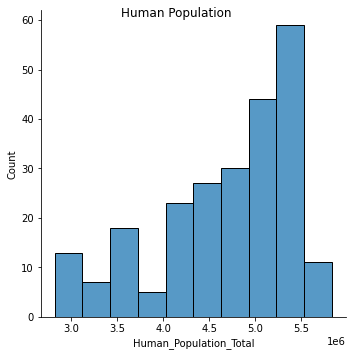

In [76]:
# to see against which feature i want to work with
ax = sns.displot(selected_eu_production_lp_df["Human_Population_Total"]);
ax.fig.suptitle('Human Population');

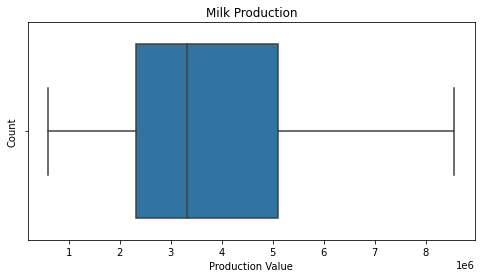

In [77]:
# boxplot Production_Value column
warnings.filterwarnings("ignore")
plt.figure(figsize=(8,4))
ax = sns.boxplot(selected_eu_production_lp_df["Production_Value"]);

ax.set_title('Milk Production')
ax.set_xlabel('Production Value')
ax.set_ylabel('Count')

plt.show()


Upon checking the data all in the columns all are useful

In [78]:
# excrct ireland data
# Select Rows Based on List of Column Values (countries)
values=["Ireland"]
Ireland_production_inc_lp_df = selected_eu_production_lp_df.loc[selected_eu_production_lp_df['Area'].isin(values)] 
print(Ireland_production_inc_lp_df)

         Area Production_Element  Item  Year Production_Unit  \
3878  Ireland         Production  Milk  1961          tonnes   
3879  Ireland         Production  Milk  1962          tonnes   
3880  Ireland         Production  Milk  1963          tonnes   
3881  Ireland         Production  Milk  1964          tonnes   
3882  Ireland         Production  Milk  1965          tonnes   
3883  Ireland         Production  Milk  1966          tonnes   
3884  Ireland         Production  Milk  1967          tonnes   
3885  Ireland         Production  Milk  1968          tonnes   
3886  Ireland         Production  Milk  1969          tonnes   
3887  Ireland         Production  Milk  1970          tonnes   
3888  Ireland         Production  Milk  1971          tonnes   
3889  Ireland         Production  Milk  1972          tonnes   
3890  Ireland         Production  Milk  1973          tonnes   
3891  Ireland         Production  Milk  1974          tonnes   
3892  Ireland         Production  Milk  

### 3.0.1 Descriptive statistics and Plots
Descriptive statistics are used to describe the basic features of the data in my project. It provide a summary about the data and the measures. Together with simple graphics analysis, It form the basis of virtually every quantitative analysis of data.
Descriptive statistics can be useful for two purposes: 
1) To provide basic information about variables in a dataset

2) To highlight potential relationships between variables.

#### Mean
Calculate mean value

There are inbuilt method in pandas to calculate the mean value.

I chose get this information by writting my own function

The mean is the most common way to measure the center of a dataset. 
Missing data in the dataset can be replaced with mean value.

In [79]:
# calculate mean value
#create a function

def cal_mean(input_data):
    try:
        return sum(input_data) / len(input_data)
    except:
        print("some error occured!")
        
#use the function to calculate mean value
print('Mean value is:', cal_mean(np.array(Ireland_production_inc_lp_df['Production_Value'])))


Mean value is: 4892733.633333334


#### Mode
To calculate mode value<br> There are inbuilt method in pandas to calculate the mean value.

I chose get this information by writting my own function

The mode represents the value(s) that occurs most often in a dataset. The mode tells us the most common value in categorical data when the mean and median can’t be used. The mode gives us an idea of where the 'center' of a dataset is located.


In [80]:
#calculate mode value
# there are inbuilt method in pandas to calculate the maximum value. 
# I chose get this information by writting my own function 

from collections import Counter

#create a function
def calc_mode(input_data):
    try:
        c = Counter(input_data)
        return [k for k, v in c.items() if v == c.most_common(1)[0][1]]
    except:
        print("some error occured!")
#use the function to calculate mode value
calc_mode(np.array(Ireland_production_inc_lp_df['Production_Value']))

[5381800.0]

In [81]:
#calculate median value

#create a function
def calc_median(input_data):
    try:
        n = len(input_data)
        index = n // 2
        # odd number of observations
        if n % 2:
            return sorted(input_data)[index]
        # even number of observations
        return sum(sorted(input_data)[index - 1:index + 1]) / 2
    except:
        print("some error occured!")

#use the function to calculate mean value
print('Median value is', calc_median(np.array(Ireland_production_inc_lp_df['Production_Value'])))

Median value is 5242300.0


In [82]:
# calculate variance
val = Ireland_production_inc_lp_df['Production_Value']
m = sum(val) / len(val)

# calculate variance using a list comprehension
Ireland_production_inc_lp_df_variance = sum((xi - m) ** 2 for xi in val) / len(val)
print('Variance value is', Ireland_production_inc_lp_df_variance)

print('Standard Deviation value is', math.sqrt(Ireland_production_inc_lp_df_variance))

Variance value is 1919129946346.1987
Standard Deviation value is 1385326.6569102749


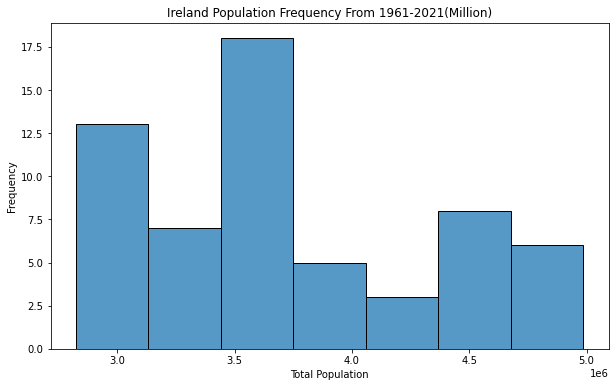

In [83]:
# histogram plot on column Human_Population_Total in data frame Ireland_production_inc_lp_df
try:
    plt.figure(figsize=(10,6))
    plt.ticklabel_format(useOffset = False)
    ax = sns.histplot(Ireland_production_inc_lp_df.Human_Population_Total)
    ax.set(xlabel='Total Population', ylabel='Frequency', title ='Ireland Population Frequency From 1961-2021(Million)');
    plt.show()
except:
    print("some error occured!")

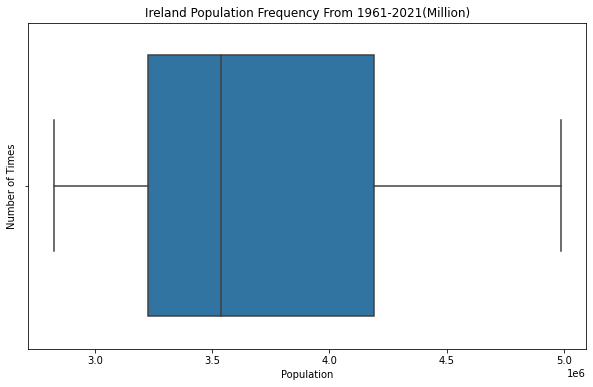

In [84]:
# boxplot on column Human_Population_Total in data frame Ireland_production_inc_lp_df
try:
    plt.figure(figsize=(10,6))
    ax = sns.boxplot(Ireland_production_inc_lp_df.Human_Population_Total)
    ax.set(xlabel='Population', ylabel='Number of Times', title ='Ireland Population Frequency From 1961-2021(Million)');
except:
    print("some error occured!")

### 3.0.2 Poisson Distribution
<strong> Why calculate Poisson </strong><br>
A Poisson distribution is a great tool that helps to predict the probability of certain events happening when you know how often the event has occurred. It gives us the probability of a given number of events happening in a fixed interval of time.

In [688]:
selected_eu_production_lp_df

,Area,Production_Element,Item,Year,Production_Unit,Production_Value,Yeild_Element,Yeild_Unit,Yeild_Value,Animal_Element,Animal_Unit,Animal_Value,Country_Code,Human_Population_Total
1967,Croatia,Production,Milk,1992,tonnes,713534.0,Yield,hg/An,14665.0,Milk Animals,Head,486542,HRV,4575818
1968,Croatia,Production,Milk,1993,tonnes,625100.0,Yield,hg/An,14990.0,Milk Animals,Head,417000,HRV,4600463
1969,Croatia,Production,Milk,1994,tonnes,605738.0,Yield,hg/An,13910.0,Milk Animals,Head,435484,HRV,4652024
1970,Croatia,Production,Milk,1995,tonnes,598084.0,Yield,hg/An,15602.0,Milk Animals,Head,383328,HRV,4620030
1971,Croatia,Production,Milk,1996,tonnes,626437.0,Yield,hg/An,17179.0,Milk Animals,Head,364648,HRV,4557097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7217,Slovakia,Production,Milk,2016,tonnes,968293.0,Yield,hg/An,26905.0,Milk Animals,Head,359890,SVK,5426252
7218,Slovakia,Production,Milk,2017,tonnes,944921.0,Yield,hg/An,27191.0,Milk Animals,Head,347514,SVK,5435343
7219,Slovakia,Production,Milk,2018,tonnes,917000.0,Yield,hg/An,26629.0,Milk Animals,Head,344360,SVK,5443120
7220,Slovakia,Production,Milk,2019,tonnes,915710.0,Yield,hg/An,28435.0,Milk Animals,Head,322040,SVK,5450421


In [85]:
# calculate mean value

#create a function
def cal_mean(input_data):
    return sum(input_data) / len(input_data)

#use the function to calculate mean value
print('Mean value is', cal_mean(np.array(Ireland_production_inc_lp_df['Yeild_Value'])))


Mean value is 37652.46666666667


In [87]:
from scipy.stats import poisson

In [95]:
#EXACT NUMBER
#The probability of yealy average of 40000 hg/an Yeild_Value
# Yeild_Value value in one year

# λ value is 37652
poisson.pmf(k = 40000, mu = 37652)

1.3985248747511298e-34

In [93]:
#LESS OR EQUALS
#The probability of yealy average of 37652 hg/an or less Yeild_Value
# Yeild_Value value in one year

# λ value is 37652
poisson.cdf(k = 37652, mu = 37652)

0.5013706397034534

In [94]:
#MORE
#The probability of yealy average of more than 45000 hg/an Yeild_Value
# Yeild_Value value in one year

# λ value is 37652
poisson.sf(k = 45000, mu = 37652)

1.1982417739881362e-295

In [731]:
Ireland_production_inc_lp_df.head()

,Area,Production_Element,Item,Year,Production_Unit,Production_Value,Yeild_Element,Yeild_Unit,Yeild_Value,Animal_Element,Animal_Unit,Animal_Value,Country_Code,Human_Population_Total
3878,Ireland,Production,Milk,1961,tonnes,2356000.0,Yield,hg/An,19536.0,Milk Animals,Head,1206000,IRL,2824400
3879,Ireland,Production,Milk,1962,tonnes,2450800.0,Yield,hg/An,20089.0,Milk Animals,Head,1220000,IRL,2836050
3880,Ireland,Production,Milk,1963,tonnes,2461100.0,Yield,hg/An,20123.0,Milk Animals,Head,1223000,IRL,2852650
3881,Ireland,Production,Milk,1964,tonnes,2548300.0,Yield,hg/An,19987.0,Milk Animals,Head,1275000,IRL,2866550
3882,Ireland,Production,Milk,1965,tonnes,2637800.0,Yield,hg/An,19381.0,Milk Animals,Head,1361000,IRL,2877300


In [735]:
Ire_Production_Valstd

1385326.656910275

### 3.0.3 Normal Distribution

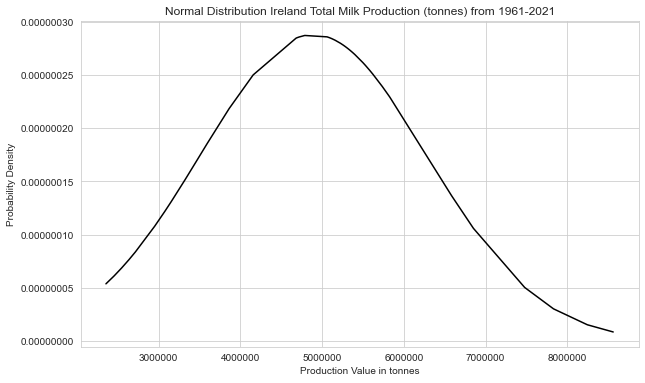

In [96]:
# plotting normal distribution graph on the data frame Ireland_production_inc_lp_df column Production_Value
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# get array value from column
Ire_Production_Val = np.array(Ireland_production_inc_lp_df.Production_Value)
# sort the value
Ire_Production_Val.sort()

# get Mean value
Ire_Production_Valmean = np.mean(Ire_Production_Val)

# get Standard Deviation
Ire_Production_Valstd = np.std(Ire_Production_Val)

# create the distribution
# pdf = probability density function
pdf = stats.norm.pdf(Ire_Production_Val, Ire_Production_Valmean, Ire_Production_Valstd)
# plot the results
sns.set_style('whitegrid')
try:
    plt.figure(figsize=(10,6))
    plt.ticklabel_format(style='plain')
    sns.lineplot(Ire_Production_Val, pdf , color = 'black')
    #ax.ticklabel_format(useOffset=False)
    plt.xlabel('Production Value in tonnes');
    plt.ylabel('Probability Density');
    plt.title('Normal Distribution Ireland Total Milk Production (tonnes) from 1961-2021');
except:
    print("some error occured!")

In [97]:
# get Mean value
print('Mean value is', Ire_Production_Valmean)

# get Standard Deviation
print('Standard Deviation value is', Ire_Production_Valstd)

Mean value is 4892733.633333334
Standard Deviation value is 1385326.656910275


In [102]:
#To find the probability that the variable has a value LESS than or equal
#let's say 4000000, using CDF cumulative Density Function
from scipy.stats import norm
CDF_probability = norm.cdf(x=4000000,loc=Ire_Production_Valmean,scale=Ire_Production_Valstd)
print('CDF probability is', CDF_probability)
print('CDF probability percentage is {:,.2%}'.format(CDF_probability)) 

CDF probability is 0.2596512250340077
CDF probability percentage is 25.97%


In [103]:
#To find the probability that the variable has a value GREATER than or equal to
#let's say 5000000, using SF Survival Function
import scipy
SF_probability = scipy.stats.norm.sf(x=5000000,loc=Ire_Production_Valmean,scale=Ire_Production_Valstd)
print('SF probability is', SF_probability)
print('SF probability percentage is {:,.2%}'.format(SF_probability)) 

SF probability is 0.46914058759358657
SF probability percentage is 46.91%


In [121]:
# identify unique element
selected_eu_production_lp_df["Area"].unique()

array(['Croatia', 'Denmark', 'Finland', 'Ireland', 'Slovakia'],
      dtype=object)

In [119]:
selected_eu_production_lp_df["Area"]=="Croatia"

1967     True
1968     True
1969     True
1970     True
1971     True
        ...  
7217    False
7218    False
7219    False
7220    False
7221    False
Name: Area, Length: 237, dtype: bool

### 4.0.1 Data Visualisation

In [161]:
# excrct ireland data
# Select Rows Based on List of Column Values (countries)

Ireland_milk_production = selected_eu_production_lp_df.loc[(selected_eu_production_lp_df['Area']=="Ireland")] 
print(Ireland_milk_production["Production_Value"])



3878    2356000.0
3879    2450800.0
3880    2461100.0
3881    2548300.0
3882    2637800.0
3883    2716600.0
3884    2951400.0
3885    3148700.0
3886    3145000.0
3887    3075600.0
3888    3161400.0
3889    3318900.0
3890    3475500.0
3891    3340000.0
3892    3593000.0
3893    3862700.0
3894    4157200.0
3895    4697000.0
3896    4788200.0
3897    4717400.0
3898    4682800.0
3899    5105600.0
3900    5498300.0
3901    5736500.0
3902    5830300.0
3903    5621000.0
3904    5528200.0
3905    5330300.0
3906    5381800.0
3907    5402400.0
3908    5281800.0
3909    5326100.0
3910    5267400.0
3911    5336500.0
3912    5346800.0
3913    5297100.0
3914    5256300.0
3915    5091200.0
3916    5121100.0
3917    5159788.0
3918    5381800.0
3919    5368000.0
3920    5310140.0
3921    5267880.0
3922    5061250.0
3923    5224390.0
3924    5224770.0
3925    5089960.0
3926    5228300.0
3927    5327000.0
3928    5536680.0
3929    5387770.0
3930    5583670.0
3931    5816220.0
3932    6585120.0
3933    68

In [253]:
Ireland_milk_production

,Area,Production_Element,Item,Year,Production_Unit,Production_Value,Yeild_Element,Yeild_Unit,Yeild_Value,Animal_Element,Animal_Unit,Animal_Value,Country_Code,Human_Population_Total,match,YeildIncreased,YeildIncreasedNum
3878,Ireland,Production,Milk,1961,tonnes,2356000,Yield,hg/An,19536.0,Milk Animals,Head,1206000,IRL,2824400,False,False,0
3879,Ireland,Production,Milk,1962,tonnes,2450800,Yield,hg/An,20089.0,Milk Animals,Head,1220000,IRL,2836050,True,True,1
3880,Ireland,Production,Milk,1963,tonnes,2461100,Yield,hg/An,20123.0,Milk Animals,Head,1223000,IRL,2852650,True,True,1
3881,Ireland,Production,Milk,1964,tonnes,2548300,Yield,hg/An,19987.0,Milk Animals,Head,1275000,IRL,2866550,False,False,0
3882,Ireland,Production,Milk,1965,tonnes,2637800,Yield,hg/An,19381.0,Milk Animals,Head,1361000,IRL,2877300,False,False,0
3883,Ireland,Production,Milk,1966,tonnes,2716600,Yield,hg/An,19404.0,Milk Animals,Head,1400000,IRL,2888800,True,True,1
3884,Ireland,Production,Milk,1967,tonnes,2951400,Yield,hg/An,20755.0,Milk Animals,Head,1422000,IRL,2902450,True,True,1
3887,Ireland,Production,Milk,1970,tonnes,3075600,Yield,hg/An,21674.0,Milk Animals,Head,1419000,IRL,2957250,True,True,1
3886,Ireland,Production,Milk,1969,tonnes,3145000,Yield,hg/An,21136.0,Milk Animals,Head,1488000,IRL,2932650,False,False,0
3885,Ireland,Production,Milk,1968,tonnes,3148700,Yield,hg/An,21232.0,Milk Animals,Head,1483000,IRL,2915550,True,True,1


In [156]:
Denmark_milk_production = selected_eu_production_lp_df.loc[(selected_eu_production_lp_df['Area']=="Denmark")] 
print(Denmark_milk_production)

         Area Production_Element  Item  Year Production_Unit  \
2144  Denmark         Production  Milk  1961          tonnes   
2145  Denmark         Production  Milk  1962          tonnes   
2146  Denmark         Production  Milk  1963          tonnes   
2147  Denmark         Production  Milk  1964          tonnes   
2148  Denmark         Production  Milk  1965          tonnes   
2149  Denmark         Production  Milk  1966          tonnes   
2150  Denmark         Production  Milk  1967          tonnes   
2151  Denmark         Production  Milk  1968          tonnes   
2152  Denmark         Production  Milk  1969          tonnes   
2153  Denmark         Production  Milk  1970          tonnes   
2154  Denmark         Production  Milk  1971          tonnes   
2155  Denmark         Production  Milk  1972          tonnes   
2156  Denmark         Production  Milk  1973          tonnes   
2157  Denmark         Production  Milk  1974          tonnes   
2158  Denmark         Production  Milk  

In [157]:
Finland_milk_production = selected_eu_production_lp_df.loc[(selected_eu_production_lp_df['Area']=="Finland")] 
print(Finland_milk_production)

         Area Production_Element  Item  Year Production_Unit  \
2709  Finland         Production  Milk  1961          tonnes   
2710  Finland         Production  Milk  1962          tonnes   
2711  Finland         Production  Milk  1963          tonnes   
2712  Finland         Production  Milk  1964          tonnes   
2713  Finland         Production  Milk  1965          tonnes   
2714  Finland         Production  Milk  1966          tonnes   
2715  Finland         Production  Milk  1967          tonnes   
2716  Finland         Production  Milk  1968          tonnes   
2717  Finland         Production  Milk  1969          tonnes   
2718  Finland         Production  Milk  1970          tonnes   
2719  Finland         Production  Milk  1971          tonnes   
2720  Finland         Production  Milk  1972          tonnes   
2721  Finland         Production  Milk  1973          tonnes   
2722  Finland         Production  Milk  1974          tonnes   
2723  Finland         Production  Milk  

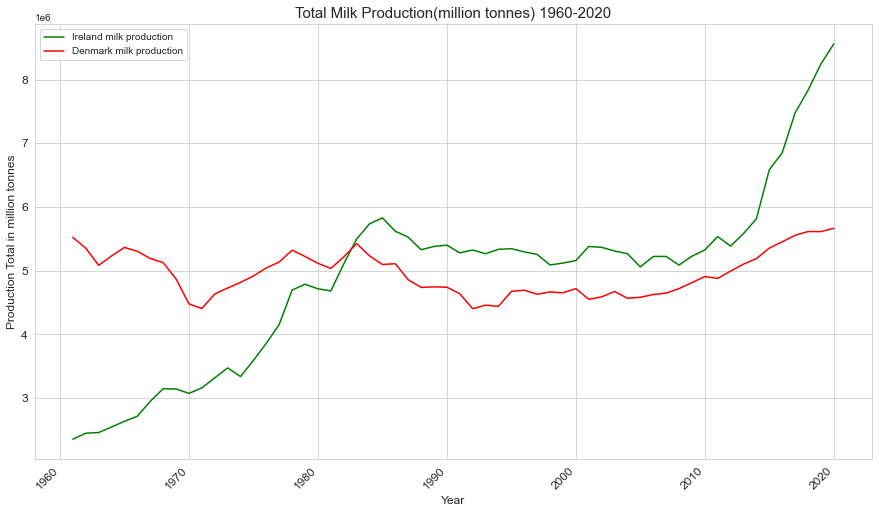

In [160]:

# Importing packages
import matplotlib.pyplot as plt

#  pedestrian total in december 2015 barplot example
x = Ireland_milk_production['Year']
y = Ireland_milk_production['Production_Value']
z = Denmark_milk_production['Production_Value']
plt.figure(figsize=(15,8))
#plt.plot(x,y,zorder=1) 
#plt.scatter(x,y)
#plt.plot(x, z)

# Plot a simple line chart
plt.plot(x, y, 'g', label='Ireland milk production')

# Plot another line on the same chart/graph
plt.plot(x, z, 'r', label='Denmark milk production')

# set fontsize and rotation of x-axis tick labels
plt.xticks(rotation=45, ha='right', fontsize=12)
# set fontsize and rotation of y-axis tick labels
plt.yticks(fontsize=12)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Production Total in million tonnes', fontsize=12)
plt.title("Total Milk Production(million tonnes) 1960-2020", fontsize=15);

plt.legend()
plt.show()

### 5.0.1 Decision Trees

Decision tree to analyse whether Milk Yeild value in Ireland is increased or decreased if it is comapared to last year

In [ ]:
# Load the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [168]:
# method to compare previous row value in a column
def comp_prev(a):
    return np.concatenate(([False],a[1:] >= a[:-1]))


In [256]:
Ireland_milk_production_decisionTrees = selected_eu_production_lp_df.loc[(selected_eu_production_lp_df['Area']=="Ireland")] 

In [257]:
Ireland_milk_production_decisionTrees.tail()

,Area,Production_Element,Item,Year,Production_Unit,Production_Value,Yeild_Element,Yeild_Unit,Yeild_Value,Animal_Element,Animal_Unit,Animal_Value,Country_Code,Human_Population_Total
3933,Ireland,Production,Milk,2016,tonnes,6851430.0,Yield,hg/An,49012.0,Milk Animals,Head,1397900,IRL,4755335
3934,Ireland,Production,Milk,2017,tonnes,7478160.0,Yield,hg/An,52197.0,Milk Animals,Head,1432687,IRL,4807388
3935,Ireland,Production,Milk,2018,tonnes,7831250.0,Yield,hg/An,57200.0,Milk Animals,Head,1369100,IRL,4867316
3936,Ireland,Production,Milk,2019,tonnes,8244870.0,Yield,hg/An,57828.0,Milk Animals,Head,1425760,IRL,4934340
3937,Ireland,Production,Milk,2020,tonnes,8561470.0,Yield,hg/An,58799.0,Milk Animals,Head,1456050,IRL,4985674


In [258]:
Ireland_milk_production_decisionTrees['YeildIncreased'] = comp_prev(Ireland_milk_production_decisionTrees.Yeild_Value.values)

In [259]:
#Ireland_milk_production_decisionTrees

In [260]:
Ireland_milk_production_decisionTrees['YeildIncreasedNum'] = Ireland_milk_production_decisionTrees["YeildIncreased"].astype(int)

In [261]:
#Ireland_milk_production_decisionTrees

In [262]:
# sort column by date column
Ireland_milk_production_decisionTrees.sort_values(by='Production_Value', inplace=True)

# change column data type
Ireland_milk_production_decisionTrees['Production_Value']=Ireland_milk_production_decisionTrees['Production_Value'].astype('int64')
Ireland_milk_production_decisionTrees['Animal_Value']=Ireland_milk_production_decisionTrees['Animal_Value'].astype('int64')


In [263]:
# Use only 'capelst_pdntotal: 1' and 'henryst_pdntotal: 4' features into X
X = Ireland_milk_production_decisionTrees.iloc[:, [5, 11]].values

# Store the 'day_of_week' feature into 'y'
y = Ireland_milk_production_decisionTrees.iloc[:, -1].values

# Display X and y 
#X, y

In [264]:
X

array([[2356000, 1206000],
       [2450800, 1220000],
       [2461100, 1223000],
       [2548300, 1275000],
       [2637800, 1361000],
       [2716600, 1400000],
       [2951400, 1422000],
       [3075600, 1419000],
       [3145000, 1488000],
       [3148700, 1483000],
       [3161400, 1450000],
       [3318900, 1301000],
       [3340000, 1431000],
       [3475500, 1389000],
       [3593000, 1406000],
       [3862700, 1380000],
       [4157200, 1436000],
       [4682800, 1449000],
       [4697000, 1484000],
       [4717400, 1503000],
       [4788200, 1513000],
       [5061250, 1055100],
       [5089960, 1095200],
       [5091200, 1201400],
       [5105600, 1458000],
       [5121100, 1198800],
       [5159788, 1177500],
       [5224390, 1084700],
       [5224770, 1089800],
       [5228300, 1096700],
       [5256300, 1215600],
       [5267400, 1246200],
       [5267880, 1156100],
       [5281800, 1322000],
       [5297100, 1220800],
       [5310140, 1155600],
       [5326100, 1288000],
 

In [265]:
y

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1])

In [266]:
# Load the library 'sklearn.model_selection'
from sklearn.model_selection import train_test_split

# Split the data set into Training and Testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Display the Number of rows and columns before (X, y) and after Splitting (X_train, X_test, y_train, y_test)
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60, 2), (60,), (48, 2), (12, 2), (48,), (12,))

In [267]:
#Feature Scaling

In [268]:
# Load the library 'sklearn.preprocessing'
from sklearn.preprocessing import StandardScaler

# Create and initialise an object by calling a method 'StandardScaler()'
sc = StandardScaler()

# Convert the X_train and X_test into standised format
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [269]:
# Display the trandofrmed values
#X_train
#X_test

Training the Decision Tree Classification model on the Training set

In [270]:
# Load the library 'sklearn.tree'
from sklearn.tree import DecisionTreeClassifier

# Create and initialise a DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 5, random_state = 0)

# Train the classifier by calling a method 'fit()'
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

Predicting the Test set results

In [271]:
# Calculate the predicted vlaue by calling a method predict()
y_pred = classifier.predict(X_test)

In [272]:
 # Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics                          
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


Making the Confusion Matrix

              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.70      0.88      0.78         8

    accuracy                           0.67        12
   macro avg       0.60      0.56      0.56        12
weighted avg       0.63      0.67      0.63        12



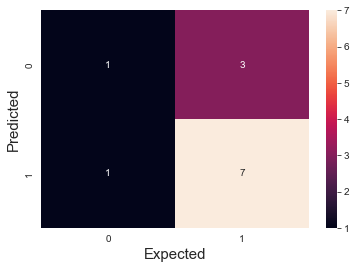

In [273]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)
plt.xlabel('Expected', fontdict={'fontsize' : 15})
plt.ylabel('Predicted', fontdict={'fontsize' : 15})
# print the classification_report based on y_test and y_predict
print(classification_report(y_test, y_pred))

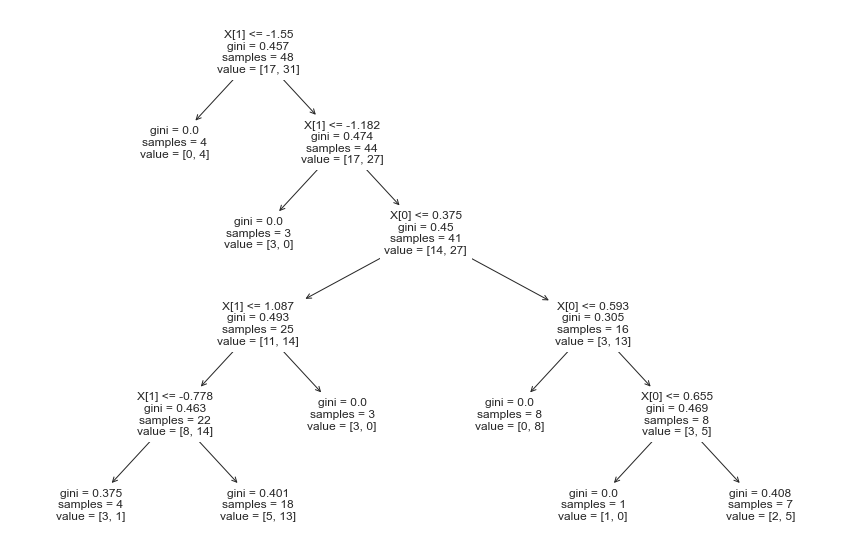

In [274]:
import matplotlib.pyplot as plt
from sklearn import tree

# Set the size of the figure
plt.figure(figsize = (15, 10))
plt.title("Decision Tree");
# Display the tree by calling a method plot_tree()
tree.plot_tree(classifier.fit(X_train, y_train), fontsize=12); 

Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


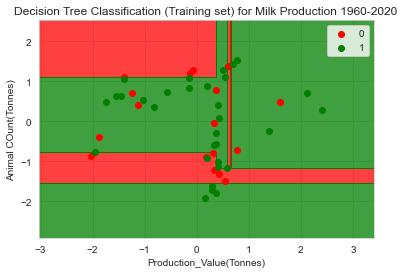

In [275]:
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

# Store the data into X_set and y_set
X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set) for Milk Production 1960-2020')
plt.xlabel('Production_Value(Tonnes)')
plt.ylabel('Animal COunt(Tonnes)')
plt.legend()
plt.show()

Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


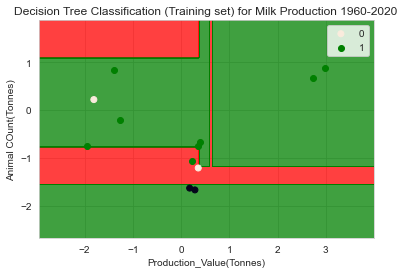

In [276]:
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set) for Milk Production 1960-2020')
plt.xlabel('Production_Value(Tonnes)')
plt.ylabel('Animal COunt(Tonnes)')
plt.legend()
plt.show()

### 6.0.1 Linear Regression Prediction

In [239]:
#import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [240]:
# method to compare previous row value in a column
def comp_prev(a):
    return np.concatenate(([False],a[1:] >= a[:-1]))

In [277]:
# make a new cope fo data frame
Ireland_milk_production_linearReg = selected_eu_production_lp_df.loc[(selected_eu_production_lp_df['Area']=="Ireland")] 

In [278]:
# some data preparation
Ireland_milk_production_linearReg.tail()

,Area,Production_Element,Item,Year,Production_Unit,Production_Value,Yeild_Element,Yeild_Unit,Yeild_Value,Animal_Element,Animal_Unit,Animal_Value,Country_Code,Human_Population_Total
3933,Ireland,Production,Milk,2016,tonnes,6851430.0,Yield,hg/An,49012.0,Milk Animals,Head,1397900,IRL,4755335
3934,Ireland,Production,Milk,2017,tonnes,7478160.0,Yield,hg/An,52197.0,Milk Animals,Head,1432687,IRL,4807388
3935,Ireland,Production,Milk,2018,tonnes,7831250.0,Yield,hg/An,57200.0,Milk Animals,Head,1369100,IRL,4867316
3936,Ireland,Production,Milk,2019,tonnes,8244870.0,Yield,hg/An,57828.0,Milk Animals,Head,1425760,IRL,4934340
3937,Ireland,Production,Milk,2020,tonnes,8561470.0,Yield,hg/An,58799.0,Milk Animals,Head,1456050,IRL,4985674


In [279]:
# add new column based on the comp_prev function
Ireland_milk_production_linearReg['YeildIncreased'] = comp_prev(Ireland_milk_production_linearReg.Yeild_Value.values)

In [280]:
# add new column on based of the value of column YeildIncreased
Ireland_milk_production_linearReg['YeildIncreasedNum'] = Ireland_milk_production_linearReg["YeildIncreased"].astype(int)

In [281]:
# sort column by date column
Ireland_milk_production_linearReg.sort_values(by='Production_Value', inplace=True)

# change column data type
Ireland_milk_production_linearReg['Production_Value']=Ireland_milk_production_linearReg['Production_Value'].astype('int64')
Ireland_milk_production_linearReg['Animal_Value']=Ireland_milk_production_linearReg['Animal_Value'].astype('int64')


In [284]:
Ireland_milk_production_linearReg.head()

,Area,Production_Element,Item,Year,Production_Unit,Production_Value,Yeild_Element,Yeild_Unit,Yeild_Value,Animal_Element,Animal_Unit,Animal_Value,Country_Code,Human_Population_Total,YeildIncreased,YeildIncreasedNum
3878,Ireland,Production,Milk,1961,tonnes,2356000,Yield,hg/An,19536.0,Milk Animals,Head,1206000,IRL,2824400,False,0
3879,Ireland,Production,Milk,1962,tonnes,2450800,Yield,hg/An,20089.0,Milk Animals,Head,1220000,IRL,2836050,True,1
3880,Ireland,Production,Milk,1963,tonnes,2461100,Yield,hg/An,20123.0,Milk Animals,Head,1223000,IRL,2852650,True,1
3881,Ireland,Production,Milk,1964,tonnes,2548300,Yield,hg/An,19987.0,Milk Animals,Head,1275000,IRL,2866550,False,0
3882,Ireland,Production,Milk,1965,tonnes,2637800,Yield,hg/An,19381.0,Milk Animals,Head,1361000,IRL,2877300,False,0


In [291]:
# assign data
x = Ireland_milk_production_linearReg['Production_Value'].values.reshape(-1, 1)
y = Ireland_milk_production_linearReg['Yeild_Value'].values.reshape(-1, 1)

In [292]:
# array of data
X = np.array(x)
y = np.array(y)

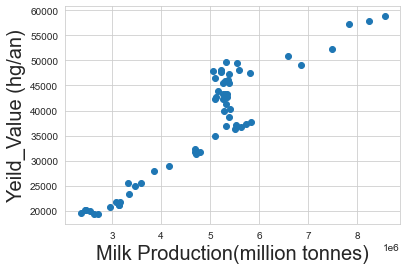

In [296]:
# visualise the data
plt.scatter(X,y)
plt.xlabel('Milk Production(million tonnes)', fontsize = 20) 
plt.ylabel('Yeild_Value (hg/an)', fontsize = 20)
plt.show()

In [297]:
# create a model and fit it
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
# Train the LinearRegression mode by using a method fit() function/ method
lr = LinearRegression().fit(X_train, y_train)

In [298]:
# Display the coefficient and intercept values
print("Intercept: {}".format(lr.intercept_))
print("Coefficient of x: {}".format(lr.coef_))
#get the results
y_pred = lr.predict(X_test)
# Display the score values by calling lr
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))

r2 = lr.score(X_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'R2 score: {r2:.2f}')
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Intercept: [1416.1266759]
Coefficient of x: [[0.00746648]]
Training set score: 0.82
R2 score: 0.91
Mean absolute error: 2767.30
Mean squared error: 13163345.31
Root mean squared error: 3628.13


### 7.0.1 Random Forest

In [299]:
# Load the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore') # We can suppress the warning

In [300]:
# method to compare previous row value in a column
def comp_prev(a):
    return np.concatenate(([False],a[1:] >= a[:-1]))

In [301]:
# make a new cope fo data frame
Ireland_milk_production_randomForest = selected_eu_production_lp_df.loc[(selected_eu_production_lp_df['Area']=="Ireland")] 

In [302]:
# some data preparation
Ireland_milk_production_randomForest.tail()

,Area,Production_Element,Item,Year,Production_Unit,Production_Value,Yeild_Element,Yeild_Unit,Yeild_Value,Animal_Element,Animal_Unit,Animal_Value,Country_Code,Human_Population_Total
3933,Ireland,Production,Milk,2016,tonnes,6851430.0,Yield,hg/An,49012.0,Milk Animals,Head,1397900,IRL,4755335
3934,Ireland,Production,Milk,2017,tonnes,7478160.0,Yield,hg/An,52197.0,Milk Animals,Head,1432687,IRL,4807388
3935,Ireland,Production,Milk,2018,tonnes,7831250.0,Yield,hg/An,57200.0,Milk Animals,Head,1369100,IRL,4867316
3936,Ireland,Production,Milk,2019,tonnes,8244870.0,Yield,hg/An,57828.0,Milk Animals,Head,1425760,IRL,4934340
3937,Ireland,Production,Milk,2020,tonnes,8561470.0,Yield,hg/An,58799.0,Milk Animals,Head,1456050,IRL,4985674


In [303]:
# add new column based on the comp_prev function
Ireland_milk_production_randomForest['YeildIncreased'] = comp_prev(Ireland_milk_production_randomForest.Yeild_Value.values)

In [304]:
# add new column on based of the value of column YeildIncreased
Ireland_milk_production_randomForest['YeildIncreasedNum'] = Ireland_milk_production_randomForest["YeildIncreased"].astype(int)

In [305]:
# sort column by date column
Ireland_milk_production_randomForest.sort_values(by='Production_Value', inplace=True)

# change column data type
Ireland_milk_production_randomForest['Production_Value']=Ireland_milk_production_randomForest['Production_Value'].astype('int64')
Ireland_milk_production_randomForest['Animal_Value']=Ireland_milk_production_randomForest['Animal_Value'].astype('int64')


In [306]:
Ireland_milk_production_randomForest.head()

,Area,Production_Element,Item,Year,Production_Unit,Production_Value,Yeild_Element,Yeild_Unit,Yeild_Value,Animal_Element,Animal_Unit,Animal_Value,Country_Code,Human_Population_Total,YeildIncreased,YeildIncreasedNum
3878,Ireland,Production,Milk,1961,tonnes,2356000,Yield,hg/An,19536.0,Milk Animals,Head,1206000,IRL,2824400,False,0
3879,Ireland,Production,Milk,1962,tonnes,2450800,Yield,hg/An,20089.0,Milk Animals,Head,1220000,IRL,2836050,True,1
3880,Ireland,Production,Milk,1963,tonnes,2461100,Yield,hg/An,20123.0,Milk Animals,Head,1223000,IRL,2852650,True,1
3881,Ireland,Production,Milk,1964,tonnes,2548300,Yield,hg/An,19987.0,Milk Animals,Head,1275000,IRL,2866550,False,0
3882,Ireland,Production,Milk,1965,tonnes,2637800,Yield,hg/An,19381.0,Milk Animals,Head,1361000,IRL,2877300,False,0


In [308]:
# Use only 'Production_Value: 5' features into X
X = Ireland_milk_production_randomForest.iloc[:, [5]].values

# Store the 'YeildIncreasedNum' feature into 'y'
y = Ireland_milk_production_randomForest.iloc[:, -1].values

# Display X and y 
#X, y

In [309]:
X

array([[2356000],
       [2450800],
       [2461100],
       [2548300],
       [2637800],
       [2716600],
       [2951400],
       [3075600],
       [3145000],
       [3148700],
       [3161400],
       [3318900],
       [3340000],
       [3475500],
       [3593000],
       [3862700],
       [4157200],
       [4682800],
       [4697000],
       [4717400],
       [4788200],
       [5061250],
       [5089960],
       [5091200],
       [5105600],
       [5121100],
       [5159788],
       [5224390],
       [5224770],
       [5228300],
       [5256300],
       [5267400],
       [5267880],
       [5281800],
       [5297100],
       [5310140],
       [5326100],
       [5327000],
       [5330300],
       [5336500],
       [5346800],
       [5368000],
       [5381800],
       [5381800],
       [5387770],
       [5402400],
       [5498300],
       [5528200],
       [5536680],
       [5583670],
       [5621000],
       [5736500],
       [5816220],
       [5830300],
       [6585120],
       [68

In [310]:
y

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1])

In [371]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35) # 65% training and 35% test

In [372]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((39, 1), (21, 1), (39,), (21,))

In [373]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators = 100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [374]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.47619047619047616


In [349]:
# making the confusion matrix

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         6
           1       0.80      0.80      0.80        15

    accuracy                           0.71        21
   macro avg       0.65      0.65      0.65        21
weighted avg       0.71      0.71      0.71        21



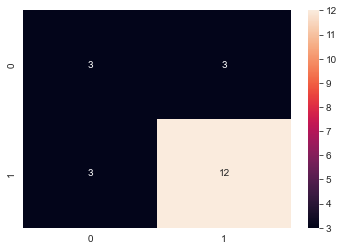

In [350]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

# print the classification_report based on y_test and y_predict
print(classification_report(y_test, y_pred))

### 8.0.1 Cross-Validation with Linear Regression 

Polynomial experiment to understand overfitting

In [375]:
# first import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

import warnings # supress warnings
warnings.filterwarnings('ignore')

In [377]:
# method to compare previous row value in a column
def comp_prev(a):
    return np.concatenate(([False],a[1:] >= a[:-1]))

In [378]:
# make a new cope fo data frame
Ireland_milk_production_CV_linearReg = selected_eu_production_lp_df.loc[(selected_eu_production_lp_df['Area']=="Ireland")] 

In [379]:
# some data preparation
Ireland_milk_production_CV_linearReg.tail()

,Area,Production_Element,Item,Year,Production_Unit,Production_Value,Yeild_Element,Yeild_Unit,Yeild_Value,Animal_Element,Animal_Unit,Animal_Value,Country_Code,Human_Population_Total
3933,Ireland,Production,Milk,2016,tonnes,6851430.0,Yield,hg/An,49012.0,Milk Animals,Head,1397900,IRL,4755335
3934,Ireland,Production,Milk,2017,tonnes,7478160.0,Yield,hg/An,52197.0,Milk Animals,Head,1432687,IRL,4807388
3935,Ireland,Production,Milk,2018,tonnes,7831250.0,Yield,hg/An,57200.0,Milk Animals,Head,1369100,IRL,4867316
3936,Ireland,Production,Milk,2019,tonnes,8244870.0,Yield,hg/An,57828.0,Milk Animals,Head,1425760,IRL,4934340
3937,Ireland,Production,Milk,2020,tonnes,8561470.0,Yield,hg/An,58799.0,Milk Animals,Head,1456050,IRL,4985674


In [380]:
# add new column based on the comp_prev function
Ireland_milk_production_CV_linearReg['YeildIncreased'] = comp_prev(Ireland_milk_production_CV_linearReg.Yeild_Value.values)

In [381]:
# add new column on based of the value of column YeildIncreased
Ireland_milk_production_CV_linearReg['YeildIncreasedNum'] = Ireland_milk_production_CV_linearReg["YeildIncreased"].astype(int)

In [382]:
# sort column by date column
Ireland_milk_production_CV_linearReg.sort_values(by='Production_Value', inplace=True)

# change column data type
Ireland_milk_production_CV_linearReg['Production_Value']=Ireland_milk_production_CV_linearReg['Production_Value'].astype('int64')
Ireland_milk_production_CV_linearReg['Animal_Value']=Ireland_milk_production_CV_linearReg['Animal_Value'].astype('int64')


In [383]:
Ireland_milk_production_CV_linearReg.head()

,Area,Production_Element,Item,Year,Production_Unit,Production_Value,Yeild_Element,Yeild_Unit,Yeild_Value,Animal_Element,Animal_Unit,Animal_Value,Country_Code,Human_Population_Total,YeildIncreased,YeildIncreasedNum
3878,Ireland,Production,Milk,1961,tonnes,2356000,Yield,hg/An,19536.0,Milk Animals,Head,1206000,IRL,2824400,False,0
3879,Ireland,Production,Milk,1962,tonnes,2450800,Yield,hg/An,20089.0,Milk Animals,Head,1220000,IRL,2836050,True,1
3880,Ireland,Production,Milk,1963,tonnes,2461100,Yield,hg/An,20123.0,Milk Animals,Head,1223000,IRL,2852650,True,1
3881,Ireland,Production,Milk,1964,tonnes,2548300,Yield,hg/An,19987.0,Milk Animals,Head,1275000,IRL,2866550,False,0
3882,Ireland,Production,Milk,1965,tonnes,2637800,Yield,hg/An,19381.0,Milk Animals,Head,1361000,IRL,2877300,False,0


In [384]:
# number of observations i used
len(Ireland_milk_production_CV_linearReg.index)

60

In [391]:
# filter only area and price
Ireland_milk_production_CV_df = Ireland_milk_production_CV_linearReg.loc[:, ['Production_Value', 'Yeild_Value']]
Ireland_milk_production_CV_df.head()

,Production_Value,Yeild_Value
3878,2356000,19536.0
3879,2450800,20089.0
3880,2461100,20123.0
3881,2548300,19987.0
3882,2637800,19381.0


In [393]:
# recaling the variables (both)
df_columns = Ireland_milk_production_CV_df.columns
scaler = MinMaxScaler()
Ireland_milk_production_CV_df = scaler.fit_transform(Ireland_milk_production_CV_df)

# rename columns (since now its an np array)
Ireland_milk_production_CV_df = pd.DataFrame(Ireland_milk_production_CV_df)
Ireland_milk_production_CV_df.columns = df_columns

Ireland_milk_production_CV_df.head()

,Production_Value,Yeild_Value
0,0.000000,0.003932
1,0.015277,0.017961
2,0.016937,0.018824
3,0.030989,0.015374
4,0.045412,0.000000


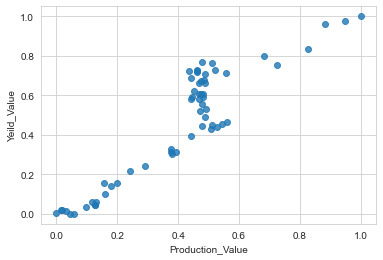

In [395]:
# visualise area-price relationship
sns.regplot(x="Production_Value", y="Yeild_Value", data=Ireland_milk_production_CV_df, fit_reg=False);

In [398]:
# split into train and test
df_train, df_test = train_test_split(Ireland_milk_production_CV_df, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 10)
print(len(df_train))
print(len(df_test))

42
18


In [399]:
# split into X and y for both train and test sets
# reshaping is required since sklearn requires the data to be in shape
# (n, 1), not as a series of shape (n, )
X_train = df_train['Production_Value']
X_train = X_train.values.reshape(-1, 1)
y_train = df_train['Yeild_Value']

X_test = df_test['Production_Value']
X_test = X_test.values.reshape(-1, 1)
y_test = df_test['Yeild_Value']

In [400]:
#Polynomial Regression

In [401]:
len(X_train)

42

In [402]:
# fit multiple polynomial features
degrees = [1, 2, 3, 6, 10, 20]

# initialise y_train_pred and y_test_pred matrices to store the train and test predictions
# each row is a data point, each column a prediction using a polynomial of some degree
y_train_pred = np.zeros((len(X_train), len(degrees)))
y_test_pred = np.zeros((len(X_test), len(degrees)))

for i, degree in enumerate(degrees):
    
    # make pipeline: create features, then feed them to linear_reg model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    
    # predict on test and train data
    # store the predictions of each degree in the corresponding column
    y_train_pred[:, i] = model.predict(X_train)
    y_test_pred[:, i] = model.predict(X_test)

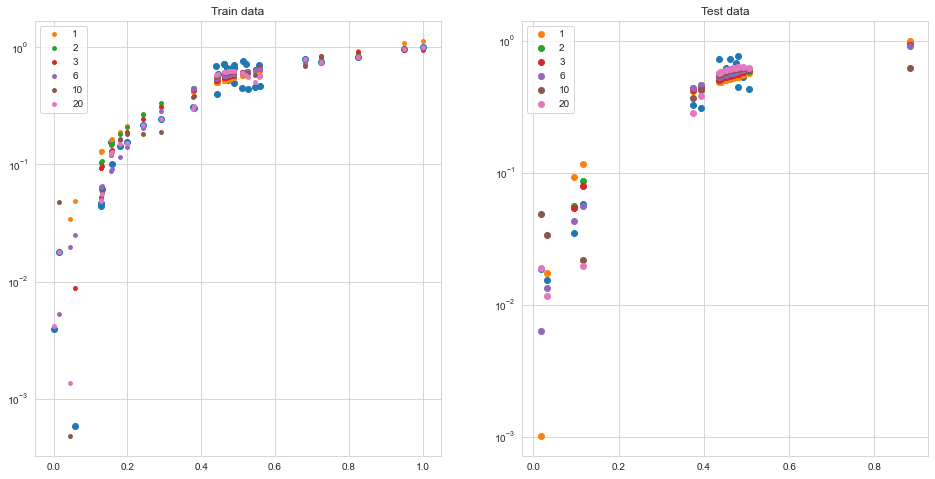

In [403]:
# visualise train and test predictions
# note that the y axis is on a log scale

plt.figure(figsize=(16, 8))

# train data
plt.subplot(121)
plt.scatter(X_train, y_train)
plt.yscale('log')
plt.title("Train data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_train, y_train_pred[:, i], s=15, label=str(degree))
    plt.legend(loc='upper left')
    
# test data
plt.subplot(122)
plt.scatter(X_test, y_test)
plt.yscale('log')
plt.title("Test data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_test, y_test_pred[:, i], label=str(degree))
    plt.legend(loc='upper left')

In [404]:
# compare r2 for train and test sets (for all polynomial fits)
print("R-squared values: \n")

for i, degree in enumerate(degrees):
    train_r2 = round(sklearn.metrics.r2_score(y_train, y_train_pred[:, i]), 2)
    test_r2 = round(sklearn.metrics.r2_score(y_test, y_test_pred[:, i]), 2)
    print("Polynomial degree {0}: train score={1}, test score={2}".format(degree, 
                                                                         train_r2, 
                                                                         test_r2))

R-squared values: 

Polynomial degree 1: train score=0.86, test score=0.81
Polynomial degree 2: train score=0.88, test score=0.83
Polynomial degree 3: train score=0.88, test score=0.83
Polynomial degree 6: train score=0.89, test score=0.85
Polynomial degree 10: train score=0.92, test score=0.79
Polynomial degree 20: train score=0.93, test score=-15172029.45


### 9.0.1 Cross Validation Methods 

Building a Model Without Cross-Validation

In [405]:
# data preparation

In [445]:
# method to compare previous row value in a column
def comp_prev(a):
    return np.concatenate(([False],a[1:] >= a[:-1]))

In [446]:
# make a new cope fo data frame
Ireland_milk_production_No_CV = selected_eu_production_lp_df.loc[(selected_eu_production_lp_df['Area']=="Ireland")] 

In [447]:
# some data preparation
Ireland_milk_production_No_CV.tail()

,Area,Production_Element,Item,Year,Production_Unit,Production_Value,Yeild_Element,Yeild_Unit,Yeild_Value,Animal_Element,Animal_Unit,Animal_Value,Country_Code,Human_Population_Total
3933,Ireland,Production,Milk,2016,tonnes,6851430.0,Yield,hg/An,49012.0,Milk Animals,Head,1397900,IRL,4755335
3934,Ireland,Production,Milk,2017,tonnes,7478160.0,Yield,hg/An,52197.0,Milk Animals,Head,1432687,IRL,4807388
3935,Ireland,Production,Milk,2018,tonnes,7831250.0,Yield,hg/An,57200.0,Milk Animals,Head,1369100,IRL,4867316
3936,Ireland,Production,Milk,2019,tonnes,8244870.0,Yield,hg/An,57828.0,Milk Animals,Head,1425760,IRL,4934340
3937,Ireland,Production,Milk,2020,tonnes,8561470.0,Yield,hg/An,58799.0,Milk Animals,Head,1456050,IRL,4985674


In [448]:
# add new column based on the comp_prev function
Ireland_milk_production_No_CV['YeildIncreased'] = comp_prev(Ireland_milk_production_No_CV.Yeild_Value.values)

In [449]:
# add new column on based of the value of column YeildIncreased
Ireland_milk_production_No_CV['YeildIncreasedNum'] = Ireland_milk_production_No_CV["YeildIncreased"].astype(int)

In [462]:
# sort column by date column
Ireland_milk_production_No_CV.sort_values(by='Production_Value', inplace=True)

# change column data type
Ireland_milk_production_No_CV['Production_Value']=Ireland_milk_production_No_CV['Production_Value'].astype('int64')
Ireland_milk_production_No_CV['Animal_Value']=Ireland_milk_production_No_CV['Animal_Value'].astype('int64')
Ireland_milk_production_No_CV['Yeild_Value']=Ireland_milk_production_No_CV['Yeild_Value'].astype('int64')

In [451]:
Ireland_milk_production_No_CV.head()

,Area,Production_Element,Item,Year,Production_Unit,Production_Value,Yeild_Element,Yeild_Unit,Yeild_Value,Animal_Element,Animal_Unit,Animal_Value,Country_Code,Human_Population_Total,YeildIncreased,YeildIncreasedNum
3878,Ireland,Production,Milk,1961,tonnes,2356000,Yield,hg/An,19536.0,Milk Animals,Head,1206000,IRL,2824400,False,0
3879,Ireland,Production,Milk,1962,tonnes,2450800,Yield,hg/An,20089.0,Milk Animals,Head,1220000,IRL,2836050,True,1
3880,Ireland,Production,Milk,1963,tonnes,2461100,Yield,hg/An,20123.0,Milk Animals,Head,1223000,IRL,2852650,True,1
3881,Ireland,Production,Milk,1964,tonnes,2548300,Yield,hg/An,19987.0,Milk Animals,Head,1275000,IRL,2866550,False,0
3882,Ireland,Production,Milk,1965,tonnes,2637800,Yield,hg/An,19381.0,Milk Animals,Head,1361000,IRL,2877300,False,0


In [452]:
Ireland_milk_production_No_CV.info()
#pdnfootfall_dt_No_CV.head(50)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 3878 to 3937
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Area                    60 non-null     object 
 1   Production_Element      60 non-null     object 
 2   Item                    60 non-null     object 
 3   Year                    60 non-null     int64  
 4   Production_Unit         60 non-null     object 
 5   Production_Value        60 non-null     int64  
 6   Yeild_Element           60 non-null     object 
 7   Yeild_Unit              60 non-null     object 
 8   Yeild_Value             60 non-null     float64
 9   Animal_Element          60 non-null     object 
 10  Animal_Unit             60 non-null     object 
 11  Animal_Value            60 non-null     int64  
 12  Country_Code            60 non-null     object 
 13  Human_Population_Total  60 non-null     int64  
 14  YeildIncreased          60 non-null    

In [453]:
# 'dummy' variables
# get dummy variables for 'furnishingstatus' 
# also, drop the first column of the resulting df (since n-1 dummy vars suffice)
status = pd.get_dummies(Ireland_milk_production_No_CV['YeildIncreased'], drop_first = True)
#status.head(50)

In [463]:
Ireland_milk_production_No_CV.head()

,Production_Value,Yeild_Value,Animal_Value,YeildIncreasedNum
3878,2356000,19536,1206000,0
3879,2450800,20089,1220000,1
3880,2461100,20123,1223000,1
3881,2548300,19987,1275000,0
3882,2637800,19381,1361000,0


In [461]:
# concat the dummy variable df with the main df
#Ireland_milk_production_No_CV1 = pd.concat([Ireland_milk_production_No_CV1, status], axis = 1)

Ireland_milk_production_No_CV.head()

,Production_Value,Yeild_Value,Animal_Value,YeildIncreasedNum
3878,2356000,19536.0,1206000,0
3879,2450800,20089.0,1220000,1
3880,2461100,20123.0,1223000,1
3881,2548300,19987.0,1275000,0
3882,2637800,19381.0,1361000,0


In [ ]:
#Area	Production_Element	Item	Year	Production_Unit	
#Production_Value	Yeild_Element	Yeild_Unit	Yeild_Value	Animal_Element	Animal_Unit	Animal_Value	
#Country_Code	Human_Population_Total	YeildIncreased	YeildIncreasedNum

In [460]:
# remove column that are not used
Ireland_milk_production_No_CV.drop(['Area'], axis = 1, inplace = True)
Ireland_milk_production_No_CV.drop(['Production_Element'], axis = 1, inplace = True)
Ireland_milk_production_No_CV.drop(['Item'], axis = 1, inplace = True)
Ireland_milk_production_No_CV.drop(['Year'], axis = 1, inplace = True)
Ireland_milk_production_No_CV.drop(['Production_Unit'], axis = 1, inplace = True)
Ireland_milk_production_No_CV.drop(['Yeild_Element'], axis = 1, inplace = True)
Ireland_milk_production_No_CV.drop(['Yeild_Unit'], axis = 1, inplace = True)
Ireland_milk_production_No_CV.drop(['Animal_Element'], axis = 1, inplace = True)
Ireland_milk_production_No_CV.drop(['Animal_Unit'], axis = 1, inplace = True)
Ireland_milk_production_No_CV.drop(['Country_Code'], axis = 1, inplace = True)
Ireland_milk_production_No_CV.drop(['Human_Population_Total'], axis = 1, inplace = True)
Ireland_milk_production_No_CV.drop(['YeildIncreased'], axis = 1, inplace = True)

#pdnfootfall_dt_No_CV.head()

In [ ]:
Production_Value	Yeild_Value	Animal_Value

In [465]:
# split the train-test to ratio 70-30 
df_train, df_test = train_test_split(Ireland_milk_production_No_CV, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 100)

# rescale the features
scaler = MinMaxScaler()

# apply scaler() to all the numeric columns 
numeric_vars = ['Production_Value', 'Yeild_Value', 'Animal_Value']
df_train[numeric_vars] = scaler.fit_transform(df_train[numeric_vars])
#df_train.head()

In [466]:
# apply rescaling to the test data
df_test[numeric_vars] = scaler.fit_transform(df_test[numeric_vars])
#df_test.head()

In [467]:
# divide into X_train, y_train, X_test, y_test
y_train = df_train.pop('Yeild_Value')
X_train = df_train

y_test = df_test.pop('Yeild_Value')
X_test = df_test

Using Recursive Feature Elimination (RFE)

In [469]:
# num of max features
len(X_train.columns)

3

In [470]:
# first model with an arbitrary choice of n_features
# running RFE with number of features=3

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=3)             
rfe = rfe.fit(X_train, y_train)

In [471]:
# tuples of (feature name, whether selected, ranking)
# note that the 'rank' is > 1 for non-selected features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Production_Value', True, 1),
 ('Animal_Value', True, 1),
 ('YeildIncreasedNum', True, 1)]

In [472]:
# predict prices of X_test
y_pred = rfe.predict(X_test)

# evaluate the model on test set
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.9921835583298346


In [473]:
# try with another value of RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=6)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = rfe.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.9921835583298346


### 9.0.2 K-Fold Cross Validation

In [474]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd

In [475]:
# K-fold CV (using all the variables)
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=5)
scores    

array([0.99782612, 0.99164197, 0.99293006, 0.99147183, 0.99167332])

In [476]:
# the other way of doing the same thing

# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=folds)
scores   

array([0.98696421, 0.99256798, 0.99203665, 0.98340905, 0.9847078 ])

In [477]:
# can tune other metrics, such as MSE
RMSE_scores = cross_val_score(lm, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
RMSE_scores

array([-8.85746522e-05, -7.13018529e-04, -6.50934904e-04, -7.74434830e-04,
       -6.48392812e-04])

In [478]:
#view RMSE
sqrt(mean(absolute(RMSE_scores)))

0.023980641054821977

In [479]:
# can tune other metrics, such as MAE
MAE_scores = cross_val_score(lm, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)
MAE_scores

array([-0.00753346, -0.01884654, -0.0217017 , -0.01910221, -0.02010691])

In [480]:
#view MAE
mean(absolute(MAE_scores))

0.017458164400268116

### Grid Search Cross-Validation

Hyperparameter Tuning Using Grid Search Cross-Validation

In [481]:
# number of features in X_train
len(X_train.columns)

3

In [482]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 4))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3]}],
             return_train_score=True, scoring='r2', verbose=1)

In [483]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007182,0.003178,0.002593,0.000797,1,{'n_features_to_select': 1},0.681218,0.813525,0.838326,0.765266,...,0.781655,0.055468,3,0.854395,0.840486,0.832085,0.848102,0.819945,0.839003,0.012107
1,0.004788,0.001716,0.004587,0.002148,2,{'n_features_to_select': 2},0.987963,0.994210,0.991937,0.982813,...,0.988969,0.003906,1,0.994257,0.993729,0.994347,0.995025,0.993681,0.994208,0.000489
2,0.004387,0.001849,0.005386,0.002570,3,{'n_features_to_select': 3},0.986964,0.992568,0.992037,0.983409,...,0.987937,0.003745,2,0.994281,0.994062,0.994453,0.995044,0.994122,0.994392,0.000353


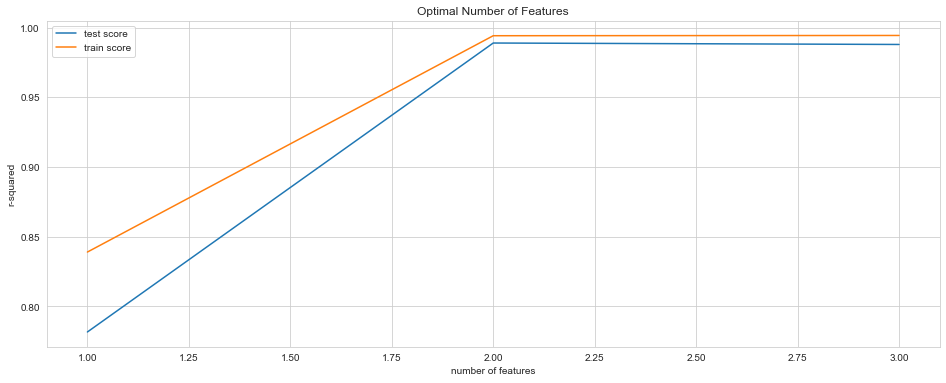

In [484]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left');

In [485]:
#Now we can choose the optimal value of number of features and build a final model.

In [486]:
# final model
#Notice that the test score is very close to the 'mean test score' on the k-folds. 

n_features_optimal = 3

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = lm.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.9921835583298346
